### ライブラリインポート

In [36]:
import polars as pl
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

from scipy.stats import binom, logistic

## 7.1 例題: GLMでは説明できないカウントデータ

In [37]:
d = pl.read_csv("../data/ch 07/data.csv").to_pandas()
d.head()

,N,y,x,id
0,8,0,2,1
1,8,1,2,2
2,8,2,2,3
3,8,4,2,4
4,8,1,2,5


In [38]:
form = "y + I(N - y) ~ x"
model = smf.glm(formula = form, data = d, family = sm.families.Binomial(link = sm.families.links.logit())).fit()

c:\Users\treme\.conda\envs\ds_env\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
C:\Users\treme\AppData\Local\Temp\ipykernel_8244\2609579546.py:9: SyntaxWarning: invalid escape sequence '\c'
  sns.scatterplot(x = d["x"] + x_jitter, y = d["y"], marker = "$\circ$", ec = "face", s = 50, ax = axes[0])
C:\Users\treme\AppData\Local\Temp\ipykernel_8244\2609579546.py:12: SyntaxWarning: invalid escape sequence '\c'
  sns.scatterplot(data = d[ d["x"] == 4 ].groupby("y").agg({"x": "sum"}).reset_index(inplace=False), x = "y", y = "x", marker = "$\circ$", ec = "face", s = 50, ax = axes[1])


(0.0, 17.0)

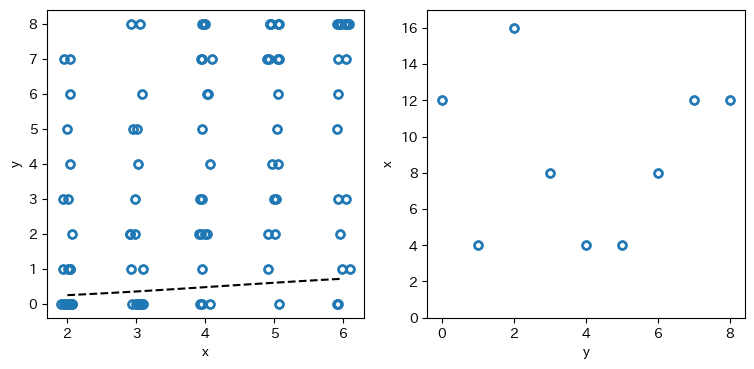

In [44]:
x_jitter = np.random.uniform(-0.1, 0.1, len(d))

N = 100
x1 = pl.DataFrame({"x": np.linspace(d["x"].min(), d["x"].max(), N)}).to_pandas()
y1 = model.predict(x1)

fig, axes = plt.subplots(1, 2, figsize = (9, 4))

sns.scatterplot(x = d["x"] + x_jitter, y = d["y"], marker = "$\circ$", ec = "face", s = 50, ax = axes[0])
sns.lineplot(x = x1["x"], y = y1, marker = None, linestyle = "--", color = "black", ax = axes[0])

sns.scatterplot(data = d[ d["x"] == 4 ].groupby("y").agg({"x": "sum"}).reset_index(inplace=False), x = "y", y = "x", marker = "$\circ$", ec = "face", s = 50, ax = axes[1])
axes[1].set_ylim(0, 17)


## 7.2 過分散と個体差

### 7.2.1 可過分散: バラツキが大きすぎる

In [45]:
d4 = d[ d["x"] == 4 ]

In [46]:
d4["y"].value_counts()

y
2    4
0    3
8    3
7    3
6    2
3    2
5    1
4    1
1    1
Name: count, dtype: int64

In [47]:
d4["y"].mean(), d4["y"].var()

(4.05, 8.365789473684211)

### 7.2.2 観測されていない個体差がもたらす過分散

### 7.2.3 観測されていない個体差とは何か?

## 7.3 一般化線形混合モデル

### 7.3.1 個体差をあらわすパラメータの追加

### 7.3.3 線形予測子の構成要素: 固定効果とランダム効果

## 7.4 一般化線形混合モデルの最尤推定

### 7.4.1 Rを使ってGLMMのパラメータを推定

## 7.5 現実のデータ解析にはGLMMが必要

### 7.5.1 反復・疑似反復と統計モデルの関係

## 7.6 いろいろな分布のGLMM

## 7.7 この章のまとめと参考文献
* ここまでの商の例題のような架空データならば,簡単なGLMを使ってデータにみられるパターンを説明できたが,現実のデータではGLMが上手く当てはまらない場合がある.
* GLMでは「説明変数が同じならどの個体も均質」と仮定していたが,観測されていない個体差があるので,集団全体の生存種子数の分布は二項分布で期待されるより過分散なものになる.
* このような状況に対応しているGLMMとは,線形予測子に個体差のばらつきをあらわすパラメータ$r_i$を追加し,全個体の$r_i$がある確率分布にしたがうと仮定したt王敬モデルである.
* 積分によって$r_i$を消去した尤度を最大化することで,GLMMの切片・傾きそして個体差$r_i$のばらつきといった,大域的なパラメータを最尤推定できる.
* ひとつの個体から複数のデータをとったり,ひとつの場所に多数の調査対象がいるような状況は疑似反復と呼ばれ,このような構造のデータに統計モデルをあてはめるときには,個体差・場所差などをくみこんだGLMMが必要である.
* データのばらつきをあらわす確率分布の種類がどのようなものであっても,個体差・場所差などに影響されるデータの部分集合があれば,これらの効果をランダム効果としてくみこんだ統計モデルで推定しなければならない.

* Crawley「統計学: Rを用いた入門書」
* Venables & Ripely「Modern applied statistics with S」
* Faraway 「Extending the linear model wih R」